# We Rate Dogs

## Table of Contents
- [Introduction](#intro)
- [Gathering](#gather)
- [Assessing](#assess)
- [Cleaning](#clean)
- [Storing and analysing and visualizing](#store)

<a id='intro'></a>
### Introduction
In this project we are going to perform data wrangling (and analyzing and visualizing) of the tweet archive of Twitter user @dog_rates, also known as WeRateDogs

<a id='gather'></a>
### Gathering Data
We will gather these three pieces of data

**The WeRateDogs Twitter archive** We will download the csv file manually

**The tweet image predictions** tell about what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. The file (image_predictions.tsv) is hosted on Udacity's servers and will be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

**Twitter API and JSON** Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count


**Twitter Archive**

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import tweepy


In [2]:
#read file
df= pd.read_csv('twitter-archive-enhanced.csv')
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

***Tweet image prediction***

In [4]:
url= ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response= requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
#read file
img_pred= pd.read_csv('image_predictions.tsv', sep='\t')
    

In [5]:
#Twitter API - get tweets with specific id
consumer_key = 'FchxSoe14BflKN4LakEqGtbpG'
consumer_secret = 'AOpgcGNvhgfHjGI91CDpg87QmCeDPWftSJU94ijDF0wOEoQOqA'
access_token = '795978236962410496-ELlZMy8oBRW8995p3XuE89VZRstVWSr'
access_secret = 'KuaX7giqBS9TSuLheVntKIxDVnnAeGIdgRlfauElUOR5p'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)


In [6]:
#Getting tweet JSON data via tweet ID and storing in a list
list_of_tweets =[]
tweets_not_found= []
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        list_of_tweets.append(tweet)
    except Exception as err :
        tweets_not_found.append(tweet_id)

Rate limit reached. Sleeping for: 730
Rate limit reached. Sleeping for: 740


In [7]:
print(len(list_of_tweets))
print(len(tweets_not_found))

2328
28


In [8]:
#looking at json data
list_of_tweets[1]

{'created_at': 'Tue Aug 01 00:17:27 +0000 2017',
 'id': 892177421306343426,
 'id_str': '892177421306343426',
 'full_text': "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'truncated': False,
 'display_text_range': [0, 138],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892177413194625024,
    'id_str': '892177413194625024',
    'indices': [139, 162],
    'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg',
    'url': 'https://t.co/0Xxu71qeIV',
    'display_url': 'pic.twitter.com/0Xxu71qeIV',
    'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'},
     'small': {'

In [9]:
#writing all json data in a text file named tweet_json.txt
with open('tweet_json.txt','w') as file:
    file.write(json.dumps(list_of_tweets, indent=4))

Identify relevant data and putting it in a dataframe named tweet JSON

Relevant parameters are:
- tweet_id
- tweet_text
- favourite_count
- retweet_count
- url in text
- retweet_status


In [10]:
tweet_json_list = []
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
    for i in data:
        tweet_id = i['id']
        tweet_text = i['full_text']
        url = tweet_text[tweet_text.find('https'):]      
        favorite_count = i['favorite_count']
        retweet_count = i['retweet_count']
        retweeted = i['retweeted'] 
        if retweeted==False:
            retweet_status= 'Original tweet'
        else:
            retweet_status= 'This is a retweet'
        
           
        tweet_json_list.append({'tweet_id': int (tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,                             
                             'retweet_status': retweet_status
                            })
        tweet_json = pd.DataFrame(tweet_json_list, columns = ['tweet_id', 'favorite_count','retweet_count', 'url','retweet_status'])


In [11]:
tweet_json.head()

,tweet_id,favorite_count,retweet_count,url,retweet_status
0,892420643555336193,34554,7194,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,29952,5400,https://t.co/0Xxu71qeIV,Original tweet
2,891815181378084864,22535,3566,https://t.co/wUnZnhtVJB,Original tweet
3,891689557279858688,37790,7419,https://t.co/tD36da7qLQ,Original tweet
4,891327558926688256,36098,7951,https://t.co/AtUZn91f7f,Original tweet


<a id='assess'></a>
## Assessing Data

### Visual assessment

In [12]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_json

Original tweet    2328
Name: retweet_status, dtype: int64

### Programmatic Assessment

In [15]:
#check for duplicated twitter id rows
df['tweet_id'].duplicated().sum()

0

In [16]:
#check for null rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
#checking for retweets
print(df['text'].str.contains('RT').sum())
print(df['retweeted_status_id'].notnull().sum())

192
181


In [18]:
#looking for errors in rating denominator values
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
pd.options.display.max_colwidth = 400
print(df.query('rating_denominator == 11')['text']) #actual rating is 14/10, actual rating is 10/10
print(df.query('rating_denominator == 50')['text']) #actual rating is 11/10
print(df.query('rating_denominator == 20')['text']) #actual rating is 13/10
print(df.query('rating_denominator == 80')['text'])
print(df.query('rating_denominator == 0')['text']) #garbage tweet
print(df.query('rating_denominator == 120')['text'])
print(df.query('rating_denominator == 7')['text'])#no rating
print(df.query('rating_denominator == 170')['text'])
print(df.query('rating_denominator == 150')['text'])
print(df.query('rating_denominator == 130')['text'])
print(df.query('rating_denominator == 90')['text'])
print(df.query('rating_denominator == 110')['text'])
print(df.query('rating_denominator == 2')['text']) #actual rating is 9/10
print(df.query('rating_denominator == 70')['text'])
print(df.query('rating_denominator == 40')['text'])
print(df.query('rating_denominator == 16')['text'])
print(df.query('rating_denominator == 15')['text']) #no rating


784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
1068    After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
1662     This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
Name: text, dtype: object
1202                                 This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1274    From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK
1351                                                                    Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa
Name: text, dtype: object
1165                                

In [20]:
#looking for errors in rating numerator values
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [21]:
#checking different numerator values manually based on trial and error
print(df.query('rating_numerator == 420')['text'])
print(df.query('rating_numerator == 165')['text'])
print(df.query('rating_numerator == 144')['text'])
print(df.query('rating_numerator == 666')['text'])
print(df.query('rating_numerator == 960')['text']) #960/00 not valid, garbage tweet
print(df.query('rating_numerator == 1776')['text'])
print(df.query('rating_numerator == 88')['text'])
print(df.query('rating_numerator == 84')['text'])
print(df.query('rating_numerator == 80')['text'])
print(df.query('rating_numerator == 182')['text'])
print(df.query('rating_numerator == 204')['text'])
print(df.query('rating_numerator == 143')['text'])
print(df.query('rating_numerator == 121')['text'])
print(df.query('rating_numerator == 17')['text'])
print(df.query('rating_numerator == 75')['text'])# decimal numerator, 9.75, will deal with all decimal numerator together
print(df.query('rating_numerator == 99')['text'])
print(df.query('rating_numerator == 60')['text'])
print(df.query('rating_numerator == 50')['text'])# 11/10
print(df.query('rating_numerator == 44')['text'])

188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
2074       After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY
Name: text, dtype: object
902    Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
Name: text, dtype: object
189    @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object
979    This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
Name: text, dtype: object
1843    Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw
Name: text, dtype: object
433    The flo

In [22]:
#checking rating numerator with decimal number
df[df['text'].str.contains(r"[+-]?(\d+\.\d*/.\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [23]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
#checking for duplicated images
img_pred['jpg_url'].duplicated().sum()

66

In [25]:
img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
img_pred.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [28]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 5 columns):
tweet_id          2328 non-null int64
favorite_count    2328 non-null int64
retweet_count     2328 non-null int64
url               2328 non-null object
retweet_status    2328 non-null object
dtypes: int64(3), object(2)
memory usage: 91.0+ KB


In [29]:
tweet_json.retweet_status.value_counts()

Original tweet    2328
Name: retweet_status, dtype: int64

### Quality

*Completeness, validity, accuracy, consistency (content issues)*

Step 1:  Make copy of data

Step 2:  Define, code and test


<a id='clean'></a>
## Cleaning Data

In [30]:
#Creating a copy of data
df_copy= df.copy()
img_pred_copy= img_pred.copy()
tweet_json_copy= tweet_json.copy()

**1. Twitter archive**
- Remove columns that won't be used for analysis

In [31]:
df_copy= df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)
list(df_copy)

['tweet_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

**2. Twitter archive**
- Remove retweets by keeping the rows with NaN retweeted_status_id

In [32]:
#keeping values with NaN retweeted_status_id
df_copy.drop(df_copy[df_copy['retweeted_status_id'].notnull()].index, inplace=True)
df_copy.retweeted_status_id.notnull().sum()

0

**3. Twitter_archive**
- Separate timestamp into day - month - year (3 columns)

Convert timestamp to datetime and extract day, month and year and store them in new columns

In [33]:
#https://stackoverflow.com/questions/57515291/convert-timestamp-to-day-month-year-and-hour
df_copy['date']= pd.to_datetime(df_copy['timestamp'])
df_copy['day']= df_copy['date'].dt.day
df_copy['month']= df_copy['date'].dt.month
df_copy['year']= df_copy['date'].dt.year
df_copy.drop('timestamp',axis=1, inplace=True)


In [34]:
df_copy.head(2)

,tweet_id,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,day,month,year
0,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,1,8,2017
1,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,1,8,2017


In [35]:
#drop date column too
df_copy.drop('date', axis=1, inplace= True)
print(df_copy.info()) #2175 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id               2175 non-null int64
text                   2175 non-null object
retweeted_status_id    0 non-null float64
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
name                   2175 non-null object
doggo                  2175 non-null object
floofer                2175 non-null object
pupper                 2175 non-null object
puppo                  2175 non-null object
day                    2175 non-null int64
month                  2175 non-null int64
year                   2175 non-null int64
dtypes: float64(1), int64(6), object(6)
memory usage: 237.9+ KB
None


**4. Twitter_archive**
- Create a single dog stage column and remove doggo, floofer, pupper and puppo columns



In [36]:
df_copy= pd.melt(df_copy, id_vars=['tweet_id','text','rating_numerator','rating_denominator','retweeted_status_id','name','day','month','year'], value_vars=None,
 var_name='dog_type', value_name='dog_stage', col_level=None)
df_copy.head()
df_copy.info() #8700 entries


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 11 columns):
tweet_id               8700 non-null int64
text                   8700 non-null object
rating_numerator       8700 non-null int64
rating_denominator     8700 non-null int64
retweeted_status_id    0 non-null float64
name                   8700 non-null object
day                    8700 non-null int64
month                  8700 non-null int64
year                   8700 non-null int64
dog_type               8700 non-null object
dog_stage              8700 non-null object
dtypes: float64(1), int64(6), object(4)
memory usage: 747.7+ KB


In [37]:
#Firstly drop dog column
df_copy.drop('dog_type', axis=1, inplace=True)
#To remove the redundant entries, first sorting on dog_stage and then drop duplicated rows based on twitter id and keeping the one
df_copy.sort_values('dog_stage')
df_copy.drop_duplicates(subset='tweet_id',keep='last', inplace=True)


In [38]:
#check
df_copy.info() #2175 entries again

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 6525 to 8699
Data columns (total 10 columns):
tweet_id               2175 non-null int64
text                   2175 non-null object
rating_numerator       2175 non-null int64
rating_denominator     2175 non-null int64
retweeted_status_id    0 non-null float64
name                   2175 non-null object
day                    2175 non-null int64
month                  2175 non-null int64
year                   2175 non-null int64
dog_stage              2175 non-null object
dtypes: float64(1), int64(6), object(3)
memory usage: 186.9+ KB


**5. Twitter_archive**
- Correct rating numerators with decimal values 


In [39]:
#changing numerator and denominator to float to account for decimals
df_copy[['rating_numerator', 'rating_denominator']] = df_copy[['rating_numerator','rating_denominator']].astype(float)
#check type
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 6525 to 8699
Data columns (total 10 columns):
tweet_id               2175 non-null int64
text                   2175 non-null object
rating_numerator       2175 non-null float64
rating_denominator     2175 non-null float64
retweeted_status_id    0 non-null float64
name                   2175 non-null object
day                    2175 non-null int64
month                  2175 non-null int64
year                   2175 non-null int64
dog_stage              2175 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 186.9+ KB


In [40]:
#Manually change the error values 
#Correcting decimal numerator first
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 883482846933004288, 13.5, df_copy['rating_numerator'])
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 786709082849828864, 9.75, df_copy['rating_numerator'])
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 778027034220126208, 11.27, df_copy['rating_numerator'])
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 681340665377193984, 19.5, df_copy['rating_numerator'])
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 680494726643068929, 11.26, df_copy['rating_numerator'])
#check
df_copy.query('tweet_id==883482846933004288')

,tweet_id,text,rating_numerator,rating_denominator,retweeted_status_id,name,day,month,year,dog_stage
6567,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.5,10.0,NaN,Bella,8,7,2017,None


In [41]:
#checking numerator with value greater than 20
df_copy[df_copy['rating_numerator'] >20][['tweet_id','rating_numerator','rating_denominator','text']]

,tweet_id,rating_numerator,rating_denominator,text
6687,855862651834028034,420.0,10.0,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research
6688,855860136149123072,666.0,10.0,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10"
6771,838150277551247360,182.0,10.0,@markhoppus 182/10
6788,835246439529840640,960.0,0.0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
6888,820690176645140481,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
6954,810984652412424192,24.0,7.0,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
7258,758467244762497024,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
7329,749981277374128128,1776.0,10.0,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
7467,731156023742988288,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
7549,716439118184652801,50.0,50.0,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq


As mentioned in the project requirements, the numerator can be larger than denominator. Therefore they can't be considered error

**6. Twitter_archive**
- Correct rating denominator as analysed


In [42]:
#manually correcting other erronous denominator
#getting tweet_id for erronous values
df_copy.query('rating_denominator == [11,50,20,0,2,15,7, 16]')


,tweet_id,text,rating_numerator,rating_denominator,retweeted_status_id,name,day,month,year,dog_stage
6788,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960.0,0.0,NaN,None,24,2,2017,None
6812,832088576586297345,@docmisterio account started on 11/15/15,11.0,15.0,NaN,None,16,2,2017,None
6954,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24.0,7.0,NaN,Sam,19,12,2016,None
7415,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9.0,11.0,NaN,None,8,6,2016,None
7512,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4.0,20.0,NaN,None,21,4,2016,None
7549,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50.0,50.0,NaN,Bluebert,3,4,2016,None
7620,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50.0,NaN,None,14,3,2016,None
7697,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50.0,NaN,a,28,2,2016,None
7944,686035780142297088,"Yes I do realize a rating of 4/20 would've been fitting. However, it would be unjust to give these cooperative pups that low of a rating",4.0,20.0,NaN,None,10,1,2016,None
8008,682962037429899265,This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,7.0,11.0,NaN,Darrel,1,1,2016,None


In [43]:
# deleting garbage values or no actual rating values
df_copy.drop(df_copy[df_copy['tweet_id']==835246439529840640].index, inplace=True, axis=0) #garbage tweet
df_copy.drop(df_copy[df_copy['tweet_id']==832088576586297345].index, inplace=True, axis=0) #no rating
df_copy.drop(df_copy[df_copy['tweet_id']==810984652412424192].index, inplace=True, axis=0) #no rating
df_copy.drop(df_copy[df_copy['tweet_id']==686035780142297088].index, inplace=True, axis=0) #not actual rating  
df_copy.drop(df_copy[df_copy['tweet_id']==682808988178739200].index, inplace=True, axis=0) #inconsistent rating 


In [44]:
#correcting numerator and denominators
#correct rating is 14/10 not 9/11
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 740373189193256964, 14, df_copy['rating_numerator'])
df_copy['rating_denominator'] = np.where(df_copy['tweet_id'] == 740373189193256964, 10, df_copy['rating_denominator'])
#correct rating is 13/10 not 4/20
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 722974582966214656, 13, df_copy['rating_numerator'])
df_copy['rating_denominator'] = np.where(df_copy['tweet_id'] == 722974582966214656, 10, df_copy['rating_denominator'])
#correct rating is 11/10 not 50/50
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 716439118184652801, 11, df_copy['rating_numerator'])
df_copy['rating_denominator'] = np.where(df_copy['tweet_id'] == 716439118184652801, 10, df_copy['rating_denominator'])
#correct rating is 10/10 not 7/11
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 682962037429899265, 10, df_copy['rating_numerator'])
df_copy['rating_denominator'] = np.where(df_copy['tweet_id'] == 682962037429899265, 10, df_copy['rating_denominator'])
#correct rating is 9/10 not 1/2
df_copy['rating_numerator'] = np.where(df_copy['tweet_id'] == 666287406224695296, 9, df_copy['rating_numerator'])
df_copy['rating_denominator'] = np.where(df_copy['tweet_id'] == 666287406224695296, 10, df_copy['rating_denominator'])

In [45]:
#checking denominators with value other than 10
df_copy[df_copy['rating_denominator'] !=10][['tweet_id','rating_numerator','rating_denominator','text']]

,tweet_id,rating_numerator,rating_denominator,text
6888,820690176645140481,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
7258,758467244762497024,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
7467,731156023742988288,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
7575,713900603437621249,99.0,90.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
7600,710658690886586372,80.0,80.0,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
7620,709198395643068416,45.0,50.0,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
7697,704054845121142784,60.0,50.0,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
7779,697463031882764288,44.0,40.0,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
7980,684225744407494656,143.0,130.0,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
7981,684222868335505415,121.0,110.0,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


It seems as if the rating numerator and denominator are given for multiple dogs

In [46]:
#calculating rating value
df_copy['rating']= (df_copy['rating_numerator']/df_copy['rating_denominator'])*10 #multiply by 10 to keep it as integer
#check
df_copy.head(2)

,tweet_id,text,rating_numerator,rating_denominator,retweeted_status_id,name,day,month,year,dog_stage,rating
6525,892420643555336193,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13.0,10.0,NaN,Phineas,1,8,2017,None,13.0
6526,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0,NaN,Tilly,1,8,2017,None,13.0


**7. Image_prediction** - Drop 66 jpg_url duplicated

In [47]:
img_pred_copy.drop_duplicates(subset=['jpg_url'], inplace=True,keep='last')
#check
img_pred_copy['jpg_url'].duplicated().sum()
img_pred_copy.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**9. Image_prediction** - Create a seperate column for image prediction and confidence interval

In [48]:
dog_type = []
confidence_level= []

def predictor(img_pred_copy):
    if img_pred_copy['p1_dog'] == True:
        dog_type.append(img_pred_copy.p1)
        confidence_level.append(img_pred_copy.p1_conf)
    else: 
        if img_pred_copy['p2_dog'] == True:
            dog_type.append(img_pred_copy.p2)
            confidence_level.append(img_pred_copy.p2_conf)
        else:  
            if img_pred_copy['p3_dog'] == True:
                dog_type.append(img_pred_copy.p3)
                confidence_level.append(img_pred_copy.p3_conf)
            else:
                dog_type.append('error')
                confidence_level.append('error') 

In [49]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
img_pred_copy.apply(predictor, axis=1)      
img_pred_copy['dog_type'] = dog_type
img_pred_copy['confidence_level'] = confidence_level
img_pred_copy.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


**8. Image_prediction** - Delete columns that won't be used for analysis

In [50]:
img_pred_copy.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],axis=1, inplace=True)
img_pred_copy.head()

,tweet_id,jpg_url,dog_type,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


**9. Tweet_json** - keep original tweets 

In [51]:
tweet_json_copy= tweet_json_copy[tweet_json_copy['retweet_status']=='Original tweet']
#check
print(tweet_json_copy['retweet_status'].value_counts())
tweet_json_copy.head(2)

Original tweet    2328
Name: retweet_status, dtype: int64


,tweet_id,favorite_count,retweet_count,url,retweet_status
0,892420643555336193,34554,7194,https://t.co/MgUWQ76dJU,Original tweet
1,892177421306343426,29952,5400,https://t.co/0Xxu71qeIV,Original tweet


**11. Tidiness** - Check the consistency of datatype on which the 3 tables had to be merged

In [52]:
#check the datatype of tweet_id for all the 3 tables
#already converted the datatype of twseetjson
df_copy.info()
img_pred_copy.info()
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 6525 to 8699
Data columns (total 11 columns):
tweet_id               2170 non-null int64
text                   2170 non-null object
rating_numerator       2170 non-null float64
rating_denominator     2170 non-null float64
retweeted_status_id    0 non-null float64
name                   2170 non-null object
day                    2170 non-null int64
month                  2170 non-null int64
year                   2170 non-null int64
dog_stage              2170 non-null object
rating                 2170 non-null float64
dtypes: float64(4), int64(4), object(3)
memory usage: 203.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id            2009 non-null int64
jpg_url             2009 non-null object
dog_type            2009 non-null object
confidence_level    2009 non-null object
dtypes: int64(1), object(3)
memory usage: 78.5+ KB
<class 'pandas.core.frame

As we see that tweet_id is int64 in all three tables. We can merege the tables 

**12. Tidiness** - Merging all tables

In [53]:
df_twitter= pd.merge(pd.merge(df_copy,img_pred_copy,on='tweet_id',how='left'),tweet_json_copy,on='tweet_id', how='left')

In [54]:
#checking for null values
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2170 entries, 0 to 2169
Data columns (total 18 columns):
tweet_id               2170 non-null int64
text                   2170 non-null object
rating_numerator       2170 non-null float64
rating_denominator     2170 non-null float64
retweeted_status_id    0 non-null float64
name                   2170 non-null object
day                    2170 non-null int64
month                  2170 non-null int64
year                   2170 non-null int64
dog_stage              2170 non-null object
rating                 2170 non-null float64
jpg_url                1927 non-null object
dog_type               1927 non-null object
confidence_level       1927 non-null object
favorite_count         2162 non-null float64
retweet_count          2162 non-null float64
url                    2162 non-null object
retweet_status         2162 non-null object
dtypes: float64(6), int64(4), object(8)
memory usage: 322.1+ KB


**13. Tidiness** - Deleting redundant data columns

In [55]:
# removing redundant info columns like retweeted_status_id,rating_numerator,rating_denominator
df_twitter= df_twitter.drop(['rating_numerator','rating_denominator','retweeted_status_id'], axis=1)

In [56]:
#drop rows with no image link
df_twitter.drop(df_twitter[df_twitter['jpg_url'].isnull()].index,axis=0, inplace=True)
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 2169
Data columns (total 15 columns):
tweet_id            1927 non-null int64
text                1927 non-null object
name                1927 non-null object
day                 1927 non-null int64
month               1927 non-null int64
year                1927 non-null int64
dog_stage           1927 non-null object
rating              1927 non-null float64
jpg_url             1927 non-null object
dog_type            1927 non-null object
confidence_level    1927 non-null object
favorite_count      1920 non-null float64
retweet_count       1920 non-null float64
url                 1920 non-null object
retweet_status      1920 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 240.9+ KB


<a id='store'></a>
## Storing, Analyzing, and Visualizing Data

In [57]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

In [58]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1927 entries, 0 to 2169
Data columns (total 15 columns):
tweet_id            1927 non-null int64
text                1927 non-null object
name                1927 non-null object
day                 1927 non-null int64
month               1927 non-null int64
year                1927 non-null int64
dog_stage           1927 non-null object
rating              1927 non-null float64
jpg_url             1927 non-null object
dog_type            1927 non-null object
confidence_level    1927 non-null object
favorite_count      1920 non-null float64
retweet_count       1920 non-null float64
url                 1920 non-null object
retweet_status      1920 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 240.9+ KB


<a id='one'></a>
### Insight one & visualization

Tweet count over time

In [59]:
#number of tweets over time
df_tweet_count= pd.DataFrame(df_twitter.groupby(['year','month'],as_index=False).tweet_id.count())
df_tweet_count.head()
df_tweet_count['timeline']= df_tweet_count["month"].astype(str)+ "-" + df_tweet_count["year"].astype(str)
df_tweet_count.drop(['year','month'], axis=1, inplace=True)
df_tweet_count.head()

,tweet_id,timeline
0,293,11-2015
1,359,12-2015
2,167,1-2016
3,109,2-2016
4,117,3-2016


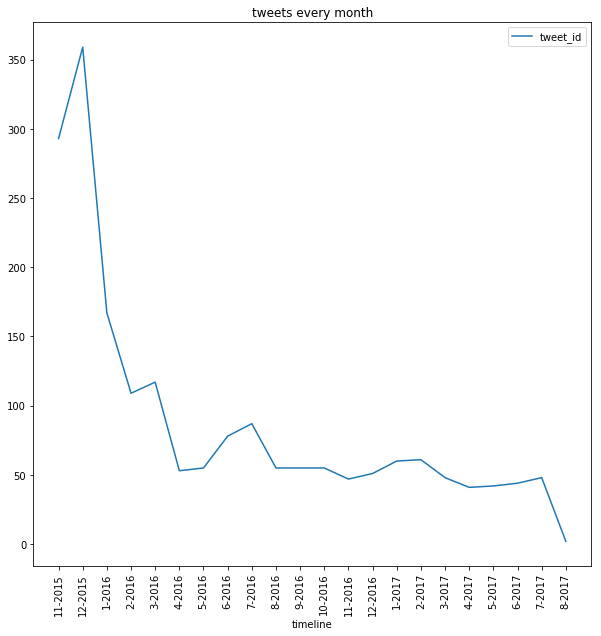

In [60]:
df_tweet_count.plot( figsize=(10,10),kind='line', x='timeline', y='tweet_id', title='tweets every month')
plt.xticks(np.arange(len(df_tweet_count.timeline)), df_tweet_count.timeline, rotation=90)

plt.show()

Decreasing trend in tweets observed over time

<a id='two'></a>
### Insight two and visualisation
Popular dog breed

In [61]:
df_dog_type=  pd.DataFrame(df_twitter.groupby(['dog_type'],as_index=False).tweet_id.count())
df_dog_type.head(2)
#as there are many dog_type, we'll plot only the top 10 breed
df_dog_type= df_dog_type.nlargest(15, 'tweet_id',keep='first')

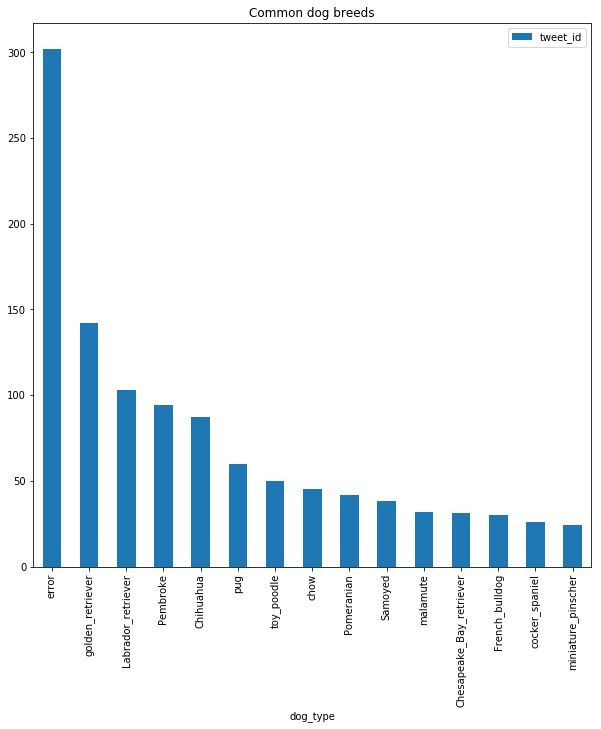

In [62]:
df_dog_type.plot(x='dog_type',figsize=(10,10),kind='bar', title='Common dog breeds')
plt.xticks(np.arange(len(df_dog_type.dog_type)), df_dog_type.dog_type, rotation=90)
plt.show()

The most common dog breed is Golden Retriever

<a id='three'></a>
### Insight three & visualization
Common names of dogs

In [63]:
df_dog_name=  pd.DataFrame(df_twitter.groupby(['name'],as_index=False).tweet_id.count())
df_dog_name.sort_values('tweet_id',ascending=False)
#as there are many dog names, we'll plot only the top 10 breed
df_dog_name= df_dog_name.nlargest(10, 'tweet_id',keep='first')

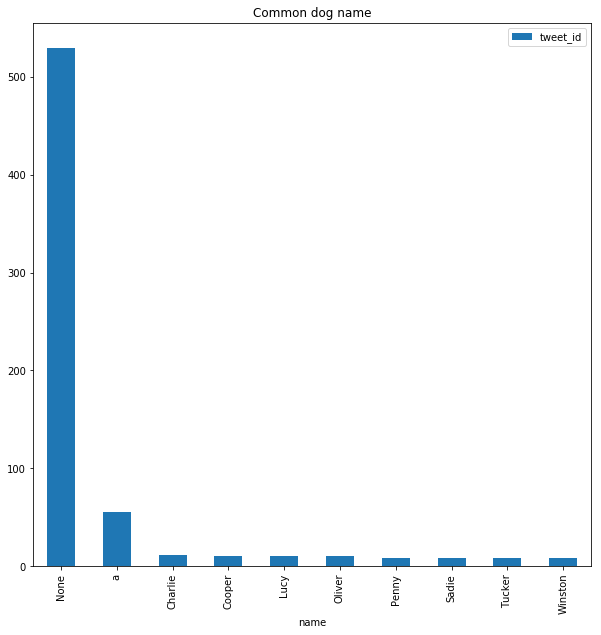

In [64]:
df_dog_name.plot(x='name', figsize=(10,10),kind='bar', title='Common dog name')
plt.xticks(np.arange(len(df_dog_name.name)),df_dog_name.name, rotation=90)
plt.show()

Most common dog name is Charlie

<a id='four'></a>
### Insight four & visualization
Retweet vs favourite count

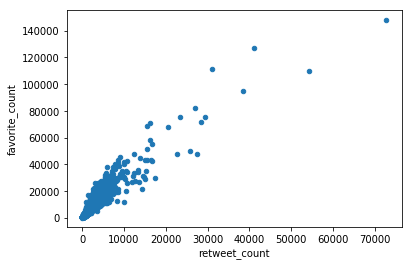

In [65]:
df_twitter.plot(kind='scatter', x='retweet_count', y='favorite_count');

Positive correlation between favourite and retweet count

<a id='five'></a>
### Insight five
Dog type vs retweet_count

In [66]:
df_dog_type_retweet=  pd.DataFrame(df_twitter.groupby(['dog_type'],as_index=False).retweet_count.count())
df_dog_type_retweet.head(2)
#as there are many dog_type, we'll plot only the top 10 breed
df_dog_type_retweet= df_dog_type_retweet.nlargest(15, 'retweet_count',keep='first')
df_dog_type_retweet.head()

,dog_type,retweet_count
87,error,302
90,golden_retriever,142
37,Labrador_retriever,100
49,Pembroke,94
16,Chihuahua,87


https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

https://stackoverflow.com/questions/56083382/regex-for-extracting-a-decimal-number

https://stackoverflow.com/questions/39680147/can-i-set-variable-column-widths-in-pandas

https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

https://www.geeksforgeeks.org/python-pandas-melt/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html#:~:text=Apply%20a%20function%20along%20an,type%20of%20the%20applied%20function.